# Regression Analysis

### 1. Importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as st
plt.style.use('fivethirtyeight')
import warnings
from pylab import rcParams
import statsmodels.api as sm

### 2. Loading the data

In [2]:
stocks_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Stock Exchange Index.csv')
RD_spending_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/R&D Spending in Canada.csv')
productivity_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Labour Productivity rate.csv')
gdp = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/GDP.csv')
cpi = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/CPI.csv')

### 3. Data Cleaning

In [3]:
#Stock Data Cleaning
stocks_data1 = stocks_data.copy()
#Get the related columns
stocks_data1 = stocks_data1[['REF_DATE','VALUE']]
#Transform the data
stocks_data1['Date'] = pd.to_datetime(stocks_data1['REF_DATE'])
#Get the mean values
stocks_data1 = round(stocks_data1.groupby(['Date'])['VALUE'].mean(),2).reset_index()
stocks_data1 = stocks_data1.rename(columns= {'VALUE': "stock_value"})
stocks_data1

,Date,stock_value
0,1956-05-01,560.09
1,1956-06-01,575.39
2,1956-07-01,617.67
3,1956-08-01,603.75
4,1956-09-01,566.99
...,...,...
804,2023-05-01,4591.43
805,2023-06-01,4595.69
806,2023-07-01,4695.08
807,2023-08-01,4650.76


In [4]:
#R&D data cleaning
RD_spending_data1 = RD_spending_data.copy()
#Data for canada
RD_spending_data1 = RD_spending_data1[RD_spending_data1['Country Name'] == 'Canada']

#Relevent columns
RD_spending_data1 = RD_spending_data1.drop(['Country Code','Indicator Name','Indicator Code'], axis= 1)
#Drop null values
RD_spending_data1.dropna(axis=1,inplace=True)
#Get the same columns for date
RD_spending_data1 = pd.melt(RD_spending_data1, id_vars=["Country Name"], var_name="Year", value_name="Value")
#Get the related columns
RD_spending_data1 = RD_spending_data1[['Year','Value']]
RD_spending_data1['Year'] = pd.to_datetime(RD_spending_data1['Year'])
RD_spending_data1 = RD_spending_data1.rename(columns = {'Value' : 'R&D Spending'})
RD_spending_data1

,Year,R&D Spending
0,1996-01-01,1.606820
1,1997-01-01,1.613860
2,1998-01-01,1.710510
3,1999-01-01,1.749850
4,2000-01-01,1.858480
5,2001-01-01,2.021170
6,2002-01-01,1.971710
7,2003-01-01,1.967810
8,2004-01-01,1.997340
9,2005-01-01,1.971270


In [5]:
#Productivity data cleaning
productivity_data1 = productivity_data.copy()
#Get the specific data and columns by filtering
productivity_data1 = productivity_data1[productivity_data1['Industry'] == 'Finance and insurance, and holding companies [BS5B]'][['REF_DATE','VALUE']]

productivity_data1 = productivity_data1.reset_index()[['REF_DATE','VALUE']]
productivity_data1['REF_DATE'] = pd.to_datetime(productivity_data1['REF_DATE'], format = '%Y')
productivity_data1 = productivity_data1.rename(columns = {'VALUE' : 'labour_productivity'})
productivity_data1

,REF_DATE,labour_productivity
0,1997-01-01,50.0
1,1998-01-01,53.4
2,1999-01-01,53.5
3,2000-01-01,53.1
4,2001-01-01,54.9
5,2002-01-01,57.4
6,2003-01-01,57.8
7,2004-01-01,58.0
8,2005-01-01,58.1
9,2006-01-01,61.0


In [6]:
#GDP Data Cleaning
gdp1 = gdp.copy()
gdp1 = gdp1[gdp1['North American Industry Classification System (NAICS)'] == 'Finance and insurance [52]'][['REF_DATE','VALUE']]

#Covert into datetime
gdp1['Date'] = pd.to_datetime(gdp1['REF_DATE'])

gdp1 = gdp1.groupby(['Date'])['VALUE'].mean().reset_index()
gdp1 = gdp1.rename(columns = {'VALUE':'GDP'})
gdp1

,Date,GDP
0,1997-01-01,67302.0
1,1997-02-01,68039.0
2,1997-03-01,67991.0
3,1997-04-01,67894.0
4,1997-05-01,68419.0
...,...,...
320,2023-09-01,157149.0
321,2023-10-01,157908.0
322,2023-11-01,157728.0
323,2023-12-01,158928.0


In [7]:
#CPI Data Cleaning
cpi1 = cpi
cpi1 = cpi1[cpi1['Products and product groups'] == 'All-items'][['REF_DATE','VALUE']]
cpi1['Date'] = pd.to_datetime(cpi1['REF_DATE'], format = '%Y')
cpi1 = cpi1[['Date','VALUE']]
cpi1 = cpi1.rename(columns = {'VALUE' : 'CPI'})
cpi1

,Date,CPI
0,1950-01-01,12.5
1,1951-01-01,13.8
2,1952-01-01,14.2
3,1953-01-01,14.0
4,1954-01-01,14.1
...,...,...
69,2019-01-01,136.0
70,2020-01-01,137.0
71,2021-01-01,141.6
72,2022-01-01,151.2


### Time Series Modeling

In [8]:
# Date as Index
stocks_data1.set_index('Date', inplace= True)
RD_spending_data1.set_index('Year',inplace=True)
productivity_data1.set_index('REF_DATE',inplace=True)
gdp1.set_index('Date',inplace=True)
cpi1.set_index('Date',inplace=True)

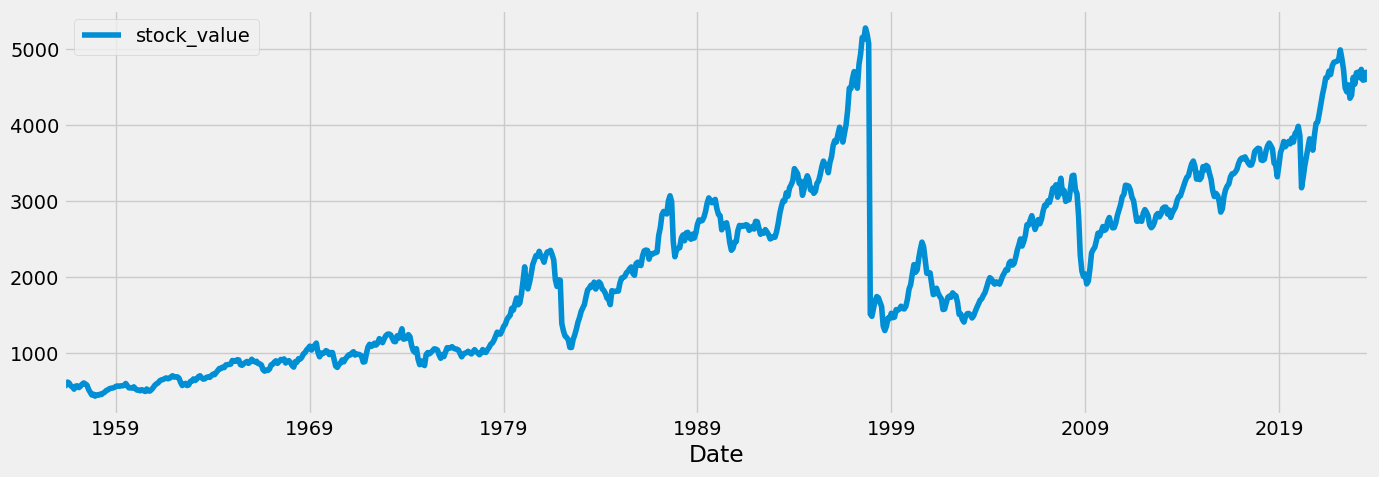

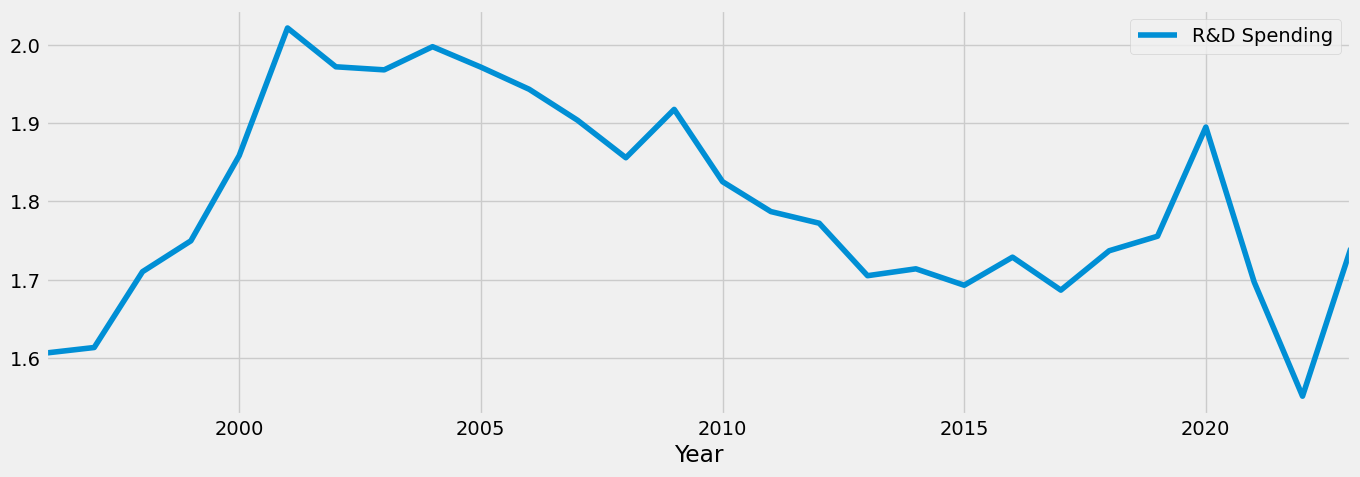

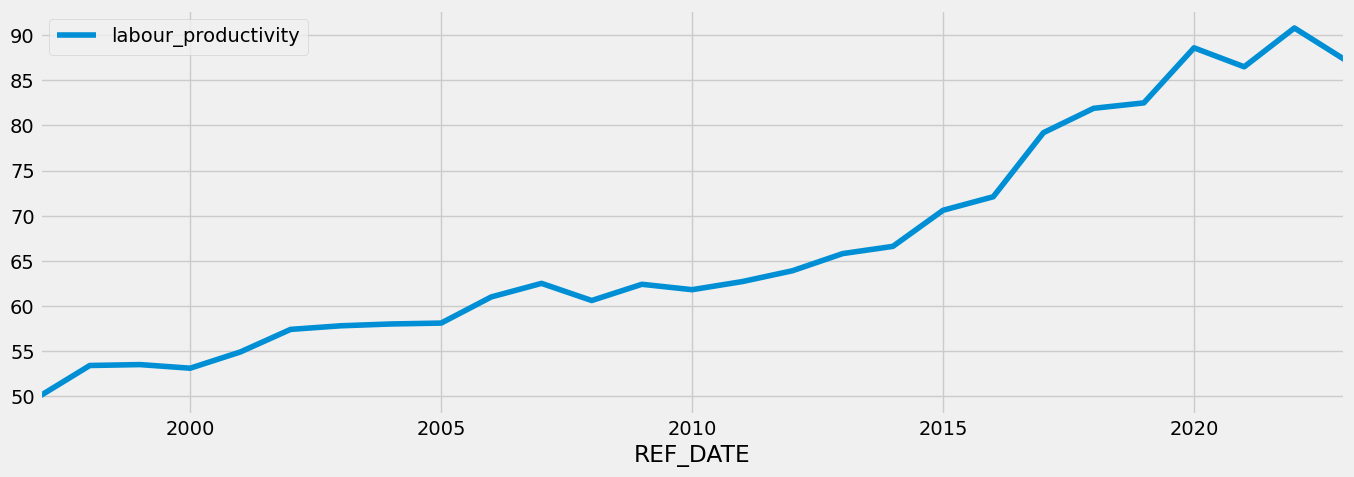

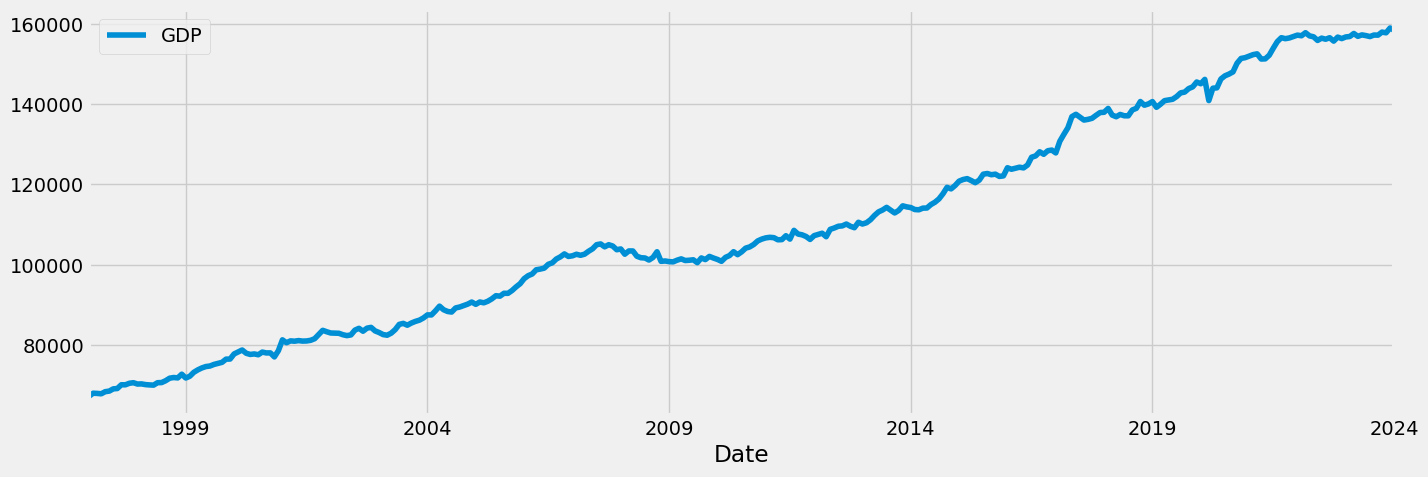

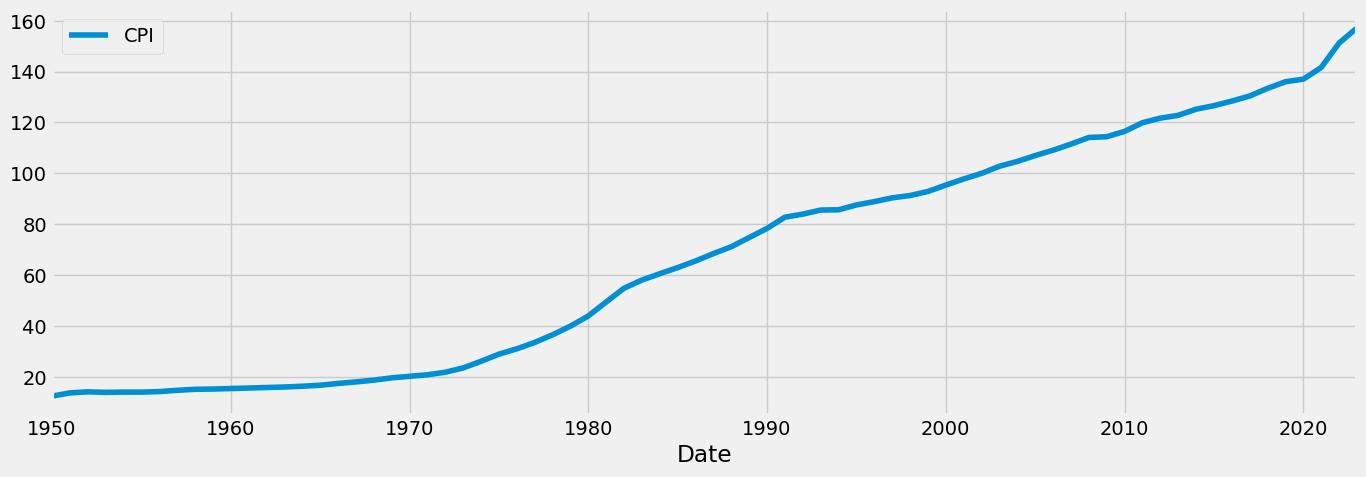

In [11]:
stocks_data1.plot(figsize = (15,5))
RD_spending_data1.plot(figsize = (15,5))
productivity_data1.plot(figsize = (15,5))
gdp1.plot(figsize = (15,5))
cpi1.plot(figsize = (15,5))
plt.show()

### Data Modeling

In [12]:
# Now we are going to select the ARIMA parameters and apply the ARIMA model
import itertools
p = d =q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [18]:
# Now using the Grid Search CV to findout the optimal parameters
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(stocks_data1,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results = mod.fit()
      print("ARIMA {}x{} 12 - AIC:{}".format(param,param_seasonal,results.aic))
    except:
      continue
    

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19862D+00    |proj g|=  4.83702D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   4.837D-07   9.199D+00
  F =   9.1986194378599127     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0)x(0, 0, 0, 12) 12 - AIC:14885.366250457339
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 varia

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.47531D+00    |proj g|=  3.16929D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     22      1     0     0   3.208D-06   7.475D+00
  F =   7.4745967679301213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0)x(0, 1, 1, 12) 12 - AIC:12097.897570510937
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62772D+00    |proj g|=  8.88977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(da

ARIMA (0, 0, 0)x(1, 1, 0, 12) 12 - AIC:12136.387383427274
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50233D+00    |proj g|=  1.19908D-01

At iterate    5    f=  7.46942D+00    |proj g|=  4.63437D-02

At iterate   10    f=  7.46792D+00    |proj g|=  1.28606D-04

At iterate   15    f=  7.46790D+00    |proj g|=  5.91176D-03

At iterate   20    f=  7.46692D+00    |proj g|=  2.92081D-02

At iterate   25    f=  7.46652D+00    |proj g|=  4.26832D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact   

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  8.61267D+00    |proj g|=  3.73004D-04

At iterate   15    f=  8.61266D+00    |proj g|=  3.64226D-03

At iterate   20    f=  8.61155D+00    |proj g|=  4.41823D-02

At iterate   25    f=  8.57663D+00    |proj g|=  2.72672D-01

At iterate   30    f=  7.96647D+00    |proj g|=  1.32322D+00

At iterate   35    f=  7.94901D+00    |proj g|=  5.93698D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     54      1     0     0   1.401D-03   7.949D+00
  F =   7.9490010623241636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1)x(0, 0, 1, 12) 12 - AIC:12867.483718

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.12496D+00    |proj g|=  1.72874D-02

At iterate   15    f=  7.11253D+00    |proj g|=  1.75042D-01

At iterate   20    f=  6.99036D+00    |proj g|=  8.82357D-02

At iterate   25    f=  6.98872D+00    |proj g|=  1.81028D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   1.810D-05   6.989D+00
  F =   6.9887237876747585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1)x(0, 1, 1, 12) 12 - AIC:11313.75508845776
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68987D+00    |proj g|=  8.46985D-01

At iterate    5    f=  8.56861D+00    |proj g|=  9.75814D-03

At iterate   10    f=  8.56804D+00    |proj g|=  5.87353D-04

At iterate   15    f=  8.56786D+00    |proj g|=  1.19897D-02


 This problem is unconstrained.



At iterate   20    f=  8.55389D+00    |proj g|=  3.36385D-02

At iterate   25    f=  8.52549D+00    |proj g|=  1.03594D-01

At iterate   30    f=  8.28738D+00    |proj g|=  9.07733D-01

At iterate   35    f=  7.67005D+00    |proj g|=  3.07327D+01

At iterate   40    f=  7.25205D+00    |proj g|=  2.18575D+00

At iterate   45    f=  7.19088D+00    |proj g|=  8.69406D-01

At iterate   50    f=  7.08381D+00    |proj g|=  7.27069D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     88      1     0     0   7.271D-02   7.084D+00
  F =   7.0838070888441296     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA (0, 0, 1)x(1, 1, 0, 12) 12 - AIC:11375.920078233657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21125D+00    |proj g|=  4.42753D-01

At iterate    5    f=  7.13254D+00    |proj g|=  4.24875D-02


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.12264D+00    |proj g|=  1.10895D-03

At iterate   15    f=  7.12238D+00    |proj g|=  1.26730D-02

At iterate   20    f=  7.05672D+00    |proj g|=  3.87391D-01

At iterate   25    f=  6.98204D+00    |proj g|=  1.48977D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   8.769D-07   6.982D+00
  F =   6.9818868655279891     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1)x(1, 1, 1, 12) 12 - AIC:11304.692948424286
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode

ARIMA (0, 1, 0)x(0, 0, 1, 12) 12 - AIC:10252.417579474104
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68697D+00    |proj g|=  7.98789D-05
ARIMA (0, 1, 0)x(0, 1, 0, 12) 12 - AIC:10821.397157642314

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   7.935D-07   6.687D+00
  F =   6.6868956474921593     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   2.687D-07   6.334D+00
  F =   6.3339670702855972     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 0)x(1, 0, 1, 12) 12 - AIC:10254.358719722097
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46632D+00    |proj g|=  6.35403D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments expl

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.28731D+00    |proj g|=  1.83442D-02

At iterate   10    f=  6.28704D+00    |proj g|=  3.69492D-03

At iterate   15    f=  6.28394D+00    |proj g|=  5.79629D-02

At iterate   20    f=  6.26465D+00    |proj g|=  1.92084D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     30      1     0     0   6.002D-06   6.265D+00
  F =   6.2645717707018429     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 0)x(1, 1, 1, 12) 12 - AIC:10142.077124995581
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode

ARIMA (0, 1, 1)x(0, 0, 0, 12) 12 - AIC:10373.552562690049
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32061D+00    |proj g|=  6.10396D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   7.926D-05   6.321D+00
  F =   6.3205778762030427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1)x(0, 0, 1, 12) 12 - AIC:10232.695003696523
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.32064D+00    |proj g|=  8.99170D-03

At iterate   10    f=  6.32057D+00    |proj g|=  1.45594D-04

At iterate   15    f=  6.32055D+00    |proj g|=  2.68915D-03

At iterate   20    f=  6.32054D+00    |proj g|=  5.81890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   5.916D-06   6.321D+00
  F =   6.3205352828752908     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1)x(1, 0, 1, 12) 12 - AIC:10234.62608769222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.46943D+00    |proj g|=  6.68755D-03

At iterate   10    f=  6.46444D+00    |proj g|=  8.31837D-02

At iterate   15    f=  6.45440D+00    |proj g|=  2.44383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   6.267D-06   6.454D+00
  F =   6.4544026635721981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1)x(1, 1, 0, 12) 12 - AIC:10449.223509659816
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(da


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   3.345D-05   6.676D+00
  F =   6.6755756639074155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0)x(0, 1, 0, 12) 12 - AIC:10805.081424202199
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55315D+00    |proj g|=  4.18150D-01

At iterate    5    f=  6.35958D+00    |proj g|=  1.10663D-01

At iterate   10    f=  6.35744D+00    |proj g|=  1.91082D-02

At iterate 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     79      2     0     0   5.583D-05   6.272D+00
  F =   6.2715011607892013     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (1, 0, 0)x(0, 1, 1, 12) 12 - AIC:10153.288878156927
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86618D+00    |proj g|=  1.02513D+00

At iterate    5    f=  6.54902D+00    |proj g|=  2.71874D+00

At iterate   10    f=  6.34142D+00    |proj g|=  8.67233D-04

           

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.45258D+00    |proj g|=  4.18316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   6.946D-07   6.453D+00
  F =   6.4525750870128551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0)x(1, 1, 0, 12) 12 - AIC:10446.2664907868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55513D+00    |proj g|=  3.97995D-01

At iterate    5    f=  6.39118D+00    |proj g|=  4.20995D-01

At iterate   

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      8      1     0     0   2.000D-05   6.646D+00
  F =   6.6457624133756186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1)x(0, 1, 0, 12) 12 - AIC:10758.84358484175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52474D+00    |proj g|=  4.04367D-01


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.33753D+00    |proj g|=  3.81655D-02

At iterate   10    f=  6.33663D+00    |proj g|=  7.01384D-03

At iterate   15    f=  6.33657D+00    |proj g|=  1.66388D-02

At iterate   20    f=  6.32906D+00    |proj g|=  2.61668D-01

At iterate   25    f=  6.26498D+00    |proj g|=  2.10333D-01

At iterate   30    f=  6.25683D+00    |proj g|=  4.71690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     39      1     0     0   1.359D-05   6.257D+00
  F =   6.2568054696378548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1)x(0, 1, 1, 12) 12 - AIC:10131.511249

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.33791D+00    |proj g|=  2.65644D-01

At iterate   10    f=  6.33048D+00    |proj g|=  3.54805D-02

At iterate   15    f=  6.32964D+00    |proj g|=  6.65827D-02

At iterate   20    f=  6.32793D+00    |proj g|=  3.89587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   1.691D-04   6.328D+00
  F =   6.3279259103477585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1)x(1, 0, 1, 12) 12 - AIC:10248.584122942673
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.44994D+00    |proj g|=  1.00996D-03

At iterate   10    f=  6.44954D+00    |proj g|=  2.13095D-02

At iterate   15    f=  6.43941D+00    |proj g|=  7.34638D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   5.303D-05   6.436D+00
  F =   6.4363427887449793     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1)x(1, 1, 0, 12) 12 - AIC:10422.002632189377
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.33768D+00    |proj g|=  3.47936D-02

At iterate   15    f=  6.33647D+00    |proj g|=  2.41557D-03

At iterate   20    f=  6.33636D+00    |proj g|=  4.68803D-02

At iterate   25    f=  6.32290D+00    |proj g|=  5.11234D-01

At iterate   30    f=  6.25807D+00    |proj g|=  5.99212D-02

At iterate   35    f=  6.25675D+00    |proj g|=  3.10173D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     45      1     0     0   2.656D-06   6.257D+00
  F =   6.2566493128527236     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 1)x(1, 1, 1, 12) 12 - AIC:10133.258588

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode

ARIMA (1, 1, 0)x(0, 1, 0, 12) 12 - AIC:10796.495009630136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37210D+00    |proj g|=  1.48660D-01


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34849D+00    |proj g|=  8.50432D-03

At iterate   10    f=  6.34816D+00    |proj g|=  2.53729D-02

At iterate   15    f=  6.30801D+00    |proj g|=  3.10892D-01

At iterate   20    f=  6.25846D+00    |proj g|=  3.57968D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     31      1     0     0   2.393D-05   6.258D+00
  F =   6.2583482761580154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0)x(0, 1, 1, 12) 12 - AIC:10132.007510823669
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode


At iterate   10    f=  6.32789D+00    |proj g|=  9.29069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     15      1     0     0   9.291D-05   6.328D+00
  F =   6.3278912062273953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0)x(1, 0, 1, 12) 12 - AIC:10246.527971675925
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46103D+00    |proj g|=  1.84165D-02

At iterate    5    f=  6.46061D+00    |proj g|=  1.30693D-02

At iterate 

 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   5.026D-06   6.446D+00
  F =   6.4463491230577015     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 0)x(1, 1, 0, 12) 12 - AIC:10436.192881107361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37744D+00    |proj g|=  1.44636D-01

At iterate    5    f=  6.34858D+00    |proj g|=  2.36547D-02

At iterate   10    f=  6.34814D+00    |proj g|=  4.70535D-03

At iterate 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode


At iterate   10    f=  6.32049D+00    |proj g|=  2.20310D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   5.045D-06   6.320D+00
  F =   6.3204846494213829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 1)x(0, 0, 1, 12) 12 - AIC:10234.544162763797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66243D+00    |proj g|=  2.75493D-04

At iterate    5    f=  6.66243D+00    |proj g|=  3.85481D-04

At iterate 

 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34156D+00    |proj g|=  6.05388D-03

At iterate   10    f=  6.34134D+00    |proj g|=  1.06507D-02

At iterate   15    f=  6.33860D+00    |proj g|=  1.48421D-02

At iterate   20    f=  6.33788D+00    |proj g|=  3.28246D-02

At iterate   25    f=  6.26985D+00    |proj g|=  3.51162D-01

At iterate   30    f=  6.25704D+00    |proj g|=  4.17070D-03

At iterate   35    f=  6.25702D+00    |proj g|=  4.22538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     66      1     0     0   7.441D-06   6.257D+00
  F =   6.2570155884370182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA (1, 1, 1)x(1, 0, 0, 12) 12 - AIC:10246.441230102491
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32088D+00    |proj g|=  1.44108D-02

At iterate    5    f=  6.32074D+00    |proj g|=  6.24012D-03

At iterate   10    f=  6.32051D+00    |proj g|=  2.11446D-04

At iterate   15    f=  6.32051D+00    |proj g|=  9.42711D-04

At iterate   20    f=  6.32050D+00    |proj g|=  2.13679D-03

At iterate   25    f=  6.32048D+00    |proj g|=  1.70647D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact   

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  6.44635D+00    |proj g|=  4.31136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   1.241D-05   6.446D+00
  F =   6.4463489743943487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1)x(1, 1, 0, 12) 12 - AIC:10438.192640570056
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37037D+00    |proj g|=  1.44148D-01


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34164D+00    |proj g|=  2.43805D-02

At iterate   10    f=  6.34132D+00    |proj g|=  2.97075D-03

At iterate   15    f=  6.33953D+00    |proj g|=  2.99847D-02

At iterate   20    f=  6.33691D+00    |proj g|=  2.55847D-02

At iterate   25    f=  6.30356D+00    |proj g|=  1.93307D-01

At iterate   30    f=  6.25243D+00    |proj g|=  2.75656D-02

At iterate   35    f=  6.25068D+00    |proj g|=  3.33066D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     50      1     0     0   9.593D-06   6.251D+00
  F =   6.2506818528036812     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47777D+00    |proj g|=  1.41482D-01

At iterate    5    f=  6.45574D+00    |proj g|=  8.93443D-03

At iterate   10    f=  6.45559D+00    |proj g|=  6.67753D-03

At iterate   15    f=  6.44956D+00    |proj g|=  9.62408D-02

At iterate   20    f=  6.36633D+00    |proj g|=  8.35622D-02

At iterate   25    f=  6.35917D+00    |proj g|=  1.37792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   

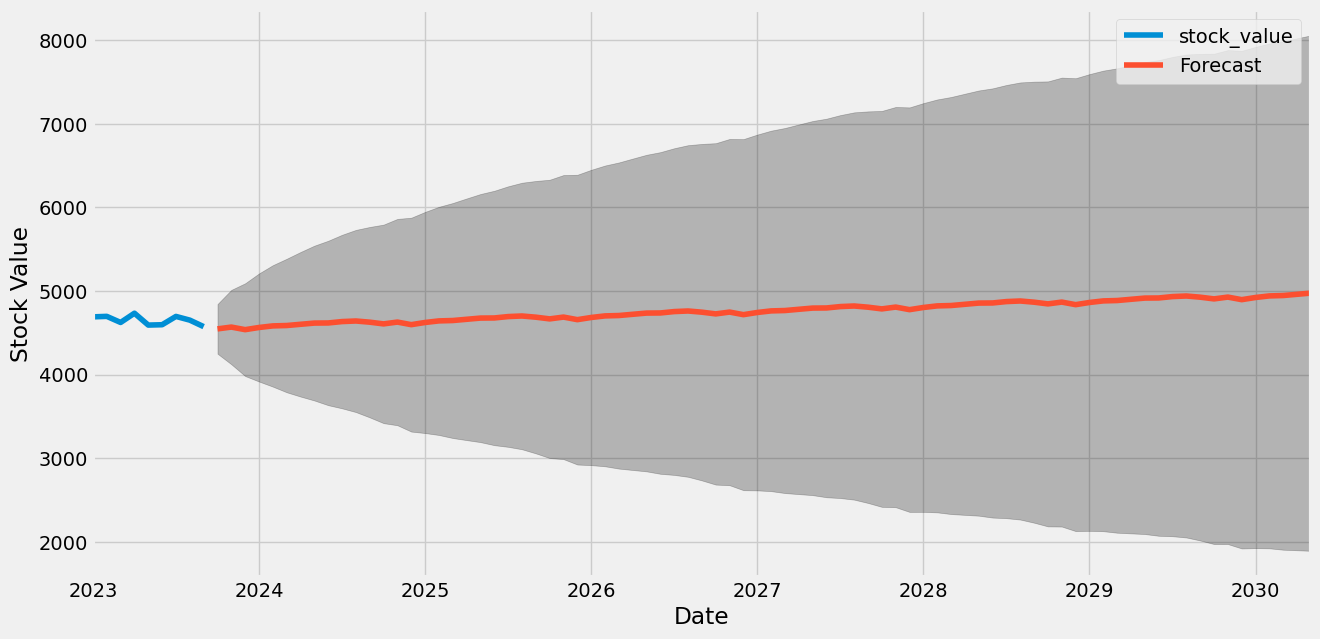

In [40]:
#Stock Prices Prediction
mod = sm.tsa.statespace.SARIMAX(stocks_data1,
                                order = (0, 1, 1),
                                seasonal_order = (0, 1, 1, 12),
                                enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])


pred_uc = results.get_forecast(steps=80)
pred_ci = pred_uc.conf_int()
ax = stocks_data1['2023':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
stock_prices_prediction = pred_uc.predicted_mean.round().astype(int)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
plt.legend()
plt.show()

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03248D-01    |proj g|=  2.61004D-01

At iterate    5    f= -3.08014D-01    |proj g|=  2.48563D-02

At iterate   10    f= -3.08080D-01    |proj g|=  4.15135D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -3.08114D-01    |proj g|=  5.16369D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     45      2     0     0   7.785D-04  -3.081D-01
  F = -0.30811428396664098     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0161      0.341     -0.047      0.962      -0.685       0.653
ma.S.L12      -0.2068      1.309     -0.158      0.874      -2.773       2.359
sigma2         0.0179      0.015      1.226  

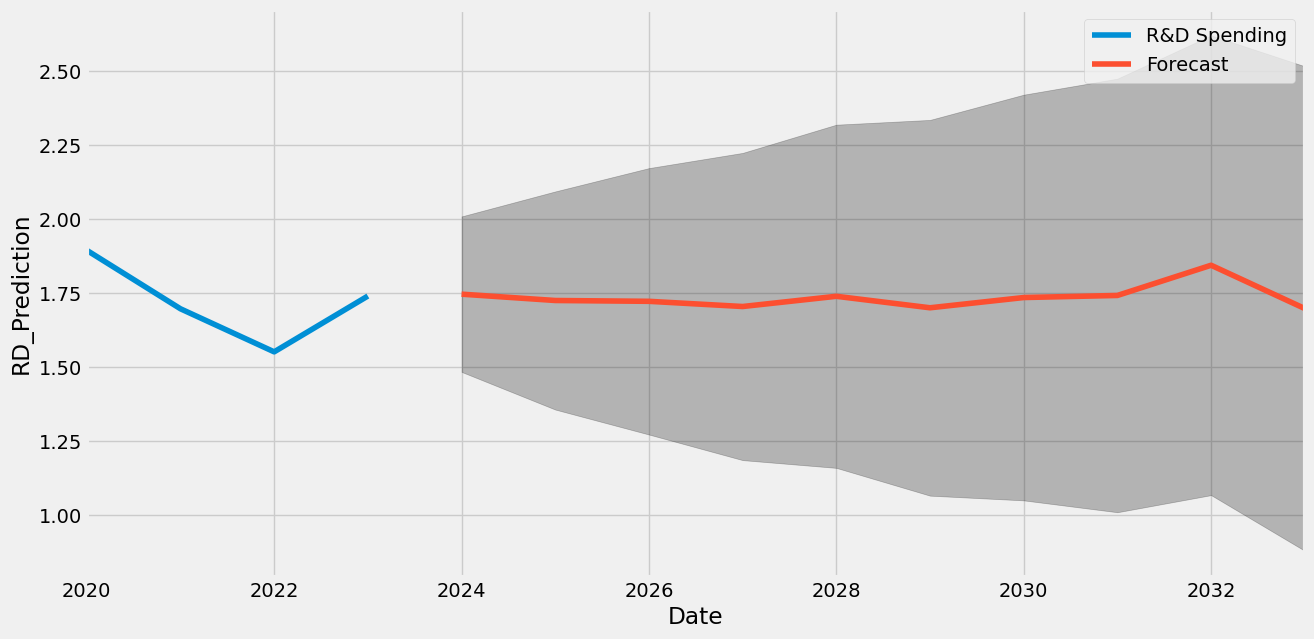

In [46]:
#RD Prediction
RD_model = sm.tsa.statespace.SARIMAX(RD_spending_data1,
                                order = (0, 1, 1),
                                seasonal_order = (0, 1, 1, 12),
                                enforce_invertibility = False)
RD_results = RD_model.fit()
print(RD_results.summary().tables[1])


RD_pred_uc = RD_results.get_forecast(steps=10)
RD_pred_ci = RD_pred_uc.conf_int()
ax = RD_spending_data1['2020':].plot(label='observed', figsize=(14, 7))
RD_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(RD_pred_ci.index,
                RD_pred_ci.iloc[:, 0],
                RD_pred_ci.iloc[:, 1], color='k', alpha=.25)
RD_prediction = RD_pred_uc.predicted_mean.round().astype(int)
ax.set_xlabel('Date')
ax.set_ylabel('RD_Prediction')
plt.legend()
plt.show()

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42666D+00    |proj g|=  1.15027D-01

At iterate    5    f=  1.39711D+00    |proj g|=  4.49082D-02

At iterate   10    f=  1.39202D+00    |proj g|=  8.55067D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   5.683D-06   1.392D+00
  F =   1.3920161276160263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025    

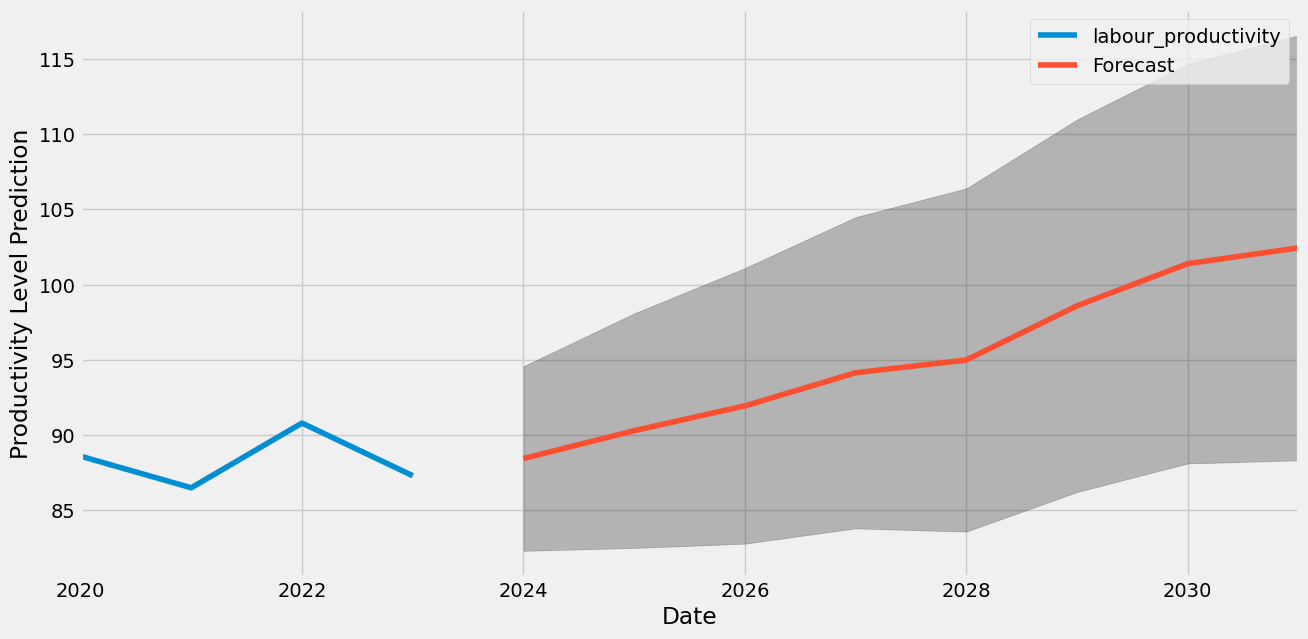

In [52]:
#Productivity data prediction
PD_model = sm.tsa.statespace.SARIMAX(productivity_data1,
                                order = (0, 1, 1),
                                seasonal_order = (0, 1, 1, 12),
                                enforce_invertibility = False)
PD_results = PD_model.fit()
print(PD_results.summary().tables[1])


PD_pred_uc = PD_results.get_forecast(steps=8)
PD_pred_ci = PD_pred_uc.conf_int()
ax = productivity_data1['2020':].plot(label='observed', figsize=(14, 7))
PD_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(PD_pred_ci.index,
                PD_pred_ci.iloc[:, 0],
                PD_pred_ci.iloc[:, 1], color='k', alpha=.25)
PD_prediction = PD_pred_uc.predicted_mean.round().astype(int)
ax.set_xlabel('Date')
ax.set_ylabel('Productivity Level Prediction')
plt.legend()
plt.show()

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45587D+00    |proj g|=  9.96454D-01

At iterate    5    f=  8.13100D+00    |proj g|=  1.05510D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.055D-04   8.131D+00
  F =   8.1309989241794529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

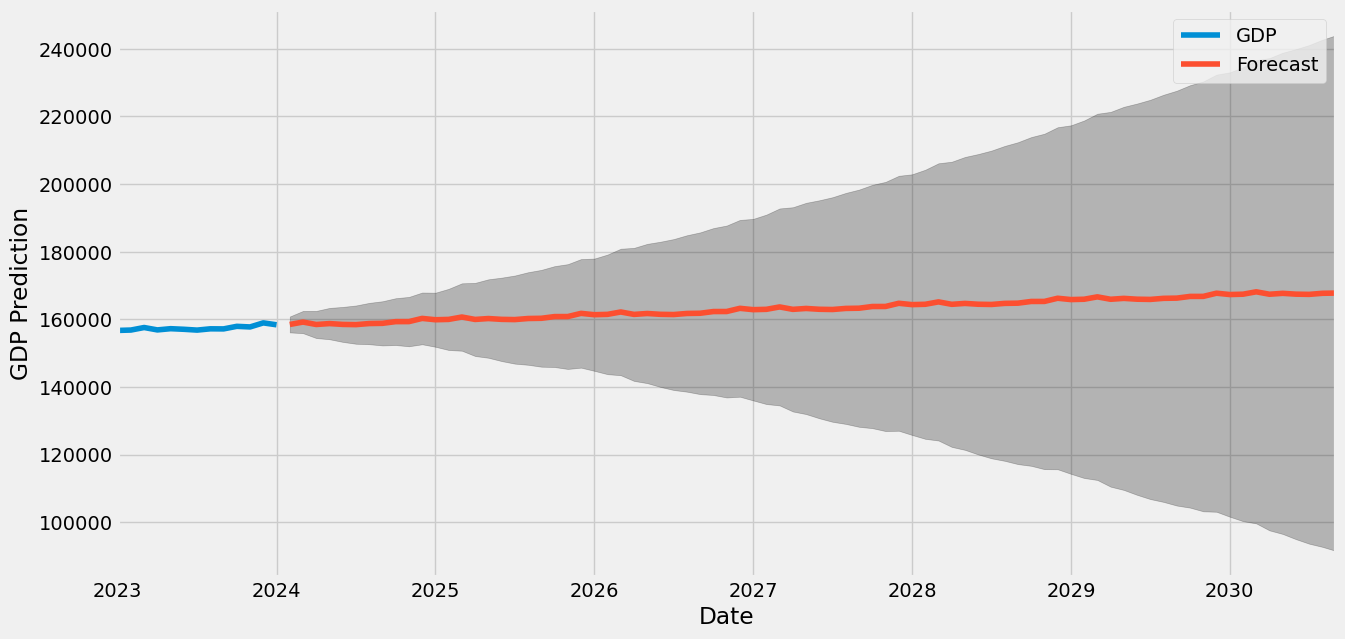

In [56]:
#GDP data prediction
GDP_model = sm.tsa.statespace.SARIMAX(gdp1,
                                order = (0, 1, 1),
                                seasonal_order = (0, 1, 1, 12),
                                enforce_invertibility = False)
GDP_results = GDP_model.fit()
print(GDP_results.summary().tables[1])


GDP_pred_uc = GDP_results.get_forecast(steps=80)
GDP_pred_ci = GDP_pred_uc.conf_int()
ax = gdp1['2023':].plot(label='observed', figsize=(14, 7))
GDP_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(GDP_pred_ci.index,
                GDP_pred_ci.iloc[:, 0],
                GDP_pred_ci.iloc[:, 1], color='k', alpha=.25)
GDP_prediction = GDP_pred_uc.predicted_mean.round().astype(int)
ax.set_xlabel('Date')
ax.set_ylabel('GDP Prediction')
plt.legend()
plt.show()

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70342D+00    |proj g|=  1.44452D+00

At iterate    5    f=  1.53587D+00    |proj g|=  3.98432D-02

At iterate   10    f=  1.53310D+00    |proj g|=  2.36497D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   2.365D-06   1.533D+00
  F =   1.5330970004818887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025    

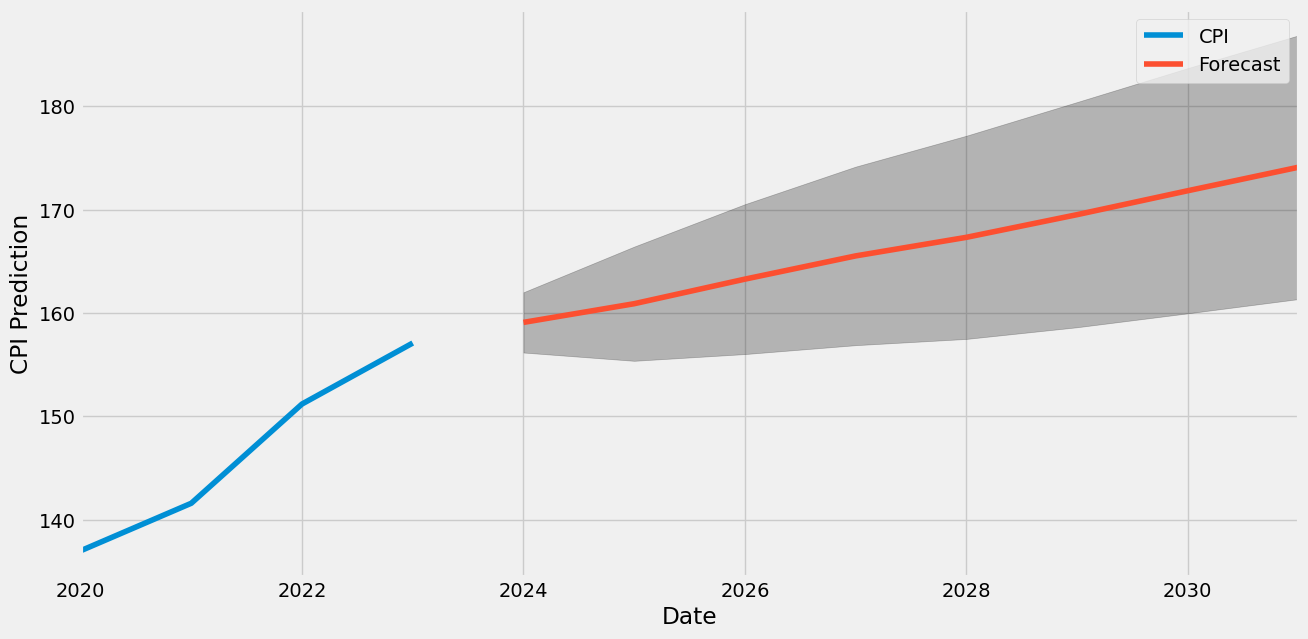

In [59]:
#CPI data prediction
CPI_model = sm.tsa.statespace.SARIMAX(cpi1,
                                order = (0, 1, 1),
                                seasonal_order = (0, 1, 1, 12),
                                enforce_invertibility = False)
CPI_results = CPI_model.fit()
print(CPI_results.summary().tables[1])


CPI_pred_uc = CPI_results.get_forecast(steps=8)
CPI_pred_ci = CPI_pred_uc.conf_int()
ax = cpi1['2020':].plot(label='observed', figsize=(14, 7))
CPI_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(CPI_pred_ci.index,
                CPI_pred_ci.iloc[:, 0],
                CPI_pred_ci.iloc[:, 1], color='k', alpha=.25)
CPI_prediction = CPI_pred_uc.predicted_mean.round().astype(int)
ax.set_xlabel('Date')
ax.set_ylabel('CPI Prediction')
plt.legend()
plt.show()

2024-01-01    159
2025-01-01    161
2026-01-01    163
2027-01-01    166
2028-01-01    167
2029-01-01    170
2030-01-01    172
2031-01-01    174
Freq: AS-JAN, Name: predicted_mean, dtype: int64

2024-02-01    158465
2024-03-01    159171
2024-04-01    158455
2024-05-01    158721
2024-06-01    158478
               ...  
2030-05-01    167665
2030-06-01    167422
2030-07-01    167357
2030-08-01    167676
2030-09-01    167739
Freq: MS, Name: predicted_mean, Length: 80, dtype: int64